# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# def leaflet_plot_stations(binsize, hashid):

#     df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

#     station_locations_by_hash = df[df['hash'] == hashid]

#     lons = station_locations_by_hash['LONGITUDE'].tolist()
#     lats = station_locations_by_hash['LATITUDE'].tolist()

#     plt.figure(figsize=(8,8))

#     plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

#     return mplleaflet.display()

# leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
#Read in dataset
data = pd.read_csv('weather_data.csv')
data.shape

(165085, 5)

In [3]:
#Convert date to datetime object for easier extraction
data['Date'] = pd.to_datetime(data['Date'])
#Pull out year, will be needed for splitting data
data['Year'] = pd.DatetimeIndex(data['Date']).year
#Pull out day of the year, will be used to group by
data['Day'] = data.Date.dt.strftime('%m-%d')
#Rearrange columns
target_cols = ['ID', 'Year', 'Day', 'Element', 'Data_Value']
data = data[target_cols]
data.shape

(165085, 5)

In [4]:
#Drop Feb 29 and split between 2005-14 and 2015
data = data[~(data['Day'] == '02-29')]
data['Data_Value'] *= 0.1
data_05 = data[~(data['Year'] == 2015)]
data_15 = data[(data['Year'] == 2015)]

In [5]:
#Group by for each new db and find max/min for each day
max_05 = data_05.groupby('Day').Data_Value.agg('max').reset_index()
min_05 = data_05.groupby('Day').Data_Value.agg('min').reset_index()
max_15 = data_15.groupby('Day').Data_Value.agg('max').reset_index()
min_15 = data_15.groupby('Day').Data_Value.agg('min').reset_index()
#Merge db's so you have maxes and 2015 data in one
merged_max = max_05.merge(max_15, on='Day')
merged_max.columns = ['Date', 'Max', '2015']
merged_min = min_05.merge(min_15, on='Day')
merged_min.columns = ['Date', 'Min', '2015']

In [6]:
#Find where 2015 max/mins are higher/lower than records
max_to_plot = merged_max[merged_max['2015'] > merged_max['Max']]
min_to_plot = merged_min[merged_min['2015'] < merged_min['Min']]

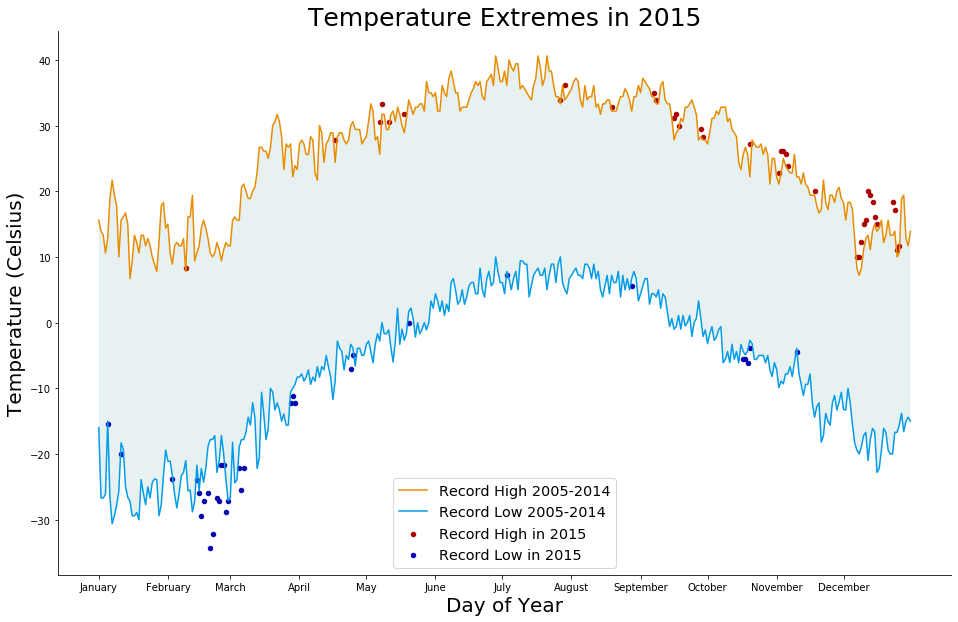

In [7]:
#Plot Findings
%matplotlib inline
#Set figure size
plt.figure(figsize=(16,10))
#Plot record highs and lows from 05-14
plt.plot(max_05['Data_Value'], c = '#e88c02', label='Record High 2005-2014')
plt.plot(min_05['Data_Value'], c = '#029be8', label= 'Record Low 2005-2014')
#Label x & y axes as well as title
plt.ylabel('Temperature (Celsius)', fontsize=20)
plt.xlabel('Day of Year', fontsize=20)
plt.title('Temperature Extremes in 2015', fontsize=25)
ax = plt.gca()
#Shade area between lines
ax.fill_between(range(len(max_05)), 
                       max_05['Data_Value'], min_05['Data_Value'], 
                       facecolor='#a1c9c9', 
                       alpha=0.25)

#Plot days in 2015 with new record highs/lows
plt.scatter(max_to_plot.index, max_to_plot['2015'], c='#ab0000', label='Record High in 2015', s=20)
plt.scatter(min_to_plot.index, min_to_plot['2015'], c='#0502b3', label='Record Low in 2015', s=20)


#Set ticks to correspond to days of year based on days in month and set labels
ax.set_xticks([0,31,59,90,120,151,181,212,243,273,304,334])
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
                   'November', 'December'])

#Show legend and position it in white space underneath curves
plt.legend(loc=8, fontsize='x-large')
#Remove spines on top and right side as they are unneccesary
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#Save image
plt.savefig('Assignment_2.png')